# A graphical example

We'll cover building a basic model and plotting the decision boundary used from previous chapters.

In [1]:
# Imports

import pandas
import numpy
import matplotlib.pyplot as plt
import tensorflow
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD

import _plotting

# Setting random seeds to get reproducible results
numpy.random.seed(0)
tensorflow.random.set_seed(1)

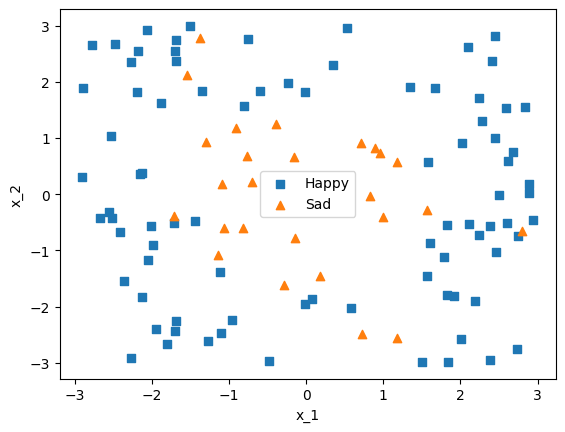

In [2]:
# Read the dataset
data = pandas.read_csv('one_circle.csv', index_col=0)
columns_features = ['x_1', 'x_2']
column_label = 'y'
features = data[columns_features].values
labels = data[column_label].values

_plotting.plot_scatter(data['x_1'][labels == 0], data['x_2'][labels == 0], marker = 's')
_plotting.plot_scatter(data['x_1'][labels == 1], data['x_2'][labels == 1], marker = '^')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend(["Happy", "Sad"])
plt.show()

## Preprocessing
We'll convert the label column to categorical to make it easier for the model to process. It also saves memory too.
Pandas has a built-in function called factorize, which interprets the number of classes for us.
Unlike keras.utils.to_categorical, this returns a 1D-array.

In [3]:
# Categorizing the output
series_labels, labels = pandas.factorize(data[column_label])

In [4]:
series_labels, labels

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0]),
 Index([0, 1], dtype='int64'))

## Model Structure

We'll use a sequential model to add a few dense layers with the ReLu activation function. Why are we using sigmoid instead of softmax? It's also a common practice to add dropout. It is also a good idea to set our unit sizes as powers of 2, which was a trick for training slightly faster on GPUs. . We also use sparse_categorical_crossentropy since our labels are 1D.

In [30]:
# Building the model
num_units_penultimate = 2**4
model = Sequential()
model.add(Dense(2**8, activation='relu', input_shape=(features.shape[1],)))
model.add(Dropout(.2))
model.add(Dense(num_units_penultimate, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(len(labels), activation='sigmoid')) # two classes, else softmax

# Compiling the model
model.compile(
    loss = 'sparse_categorical_crossentropy', # 1D labels, else crossentropy or sparse_categorical_crossentropy
    optimizer='adam', 
    metrics=['accuracy']
)
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 16)             │         4,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,914 (19.20 KB)

 Trainable params: 4,914 (19.20 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
It's a good practice to set your batch size equal to the number of penultimate neurons in your layer. Training accuracy will vary due to the stochastic nature of the model, but you can clearly see the loss going down and the accuracy going up.

In [31]:
# Training the model
history = model.fit(features, series_labels, epochs=100, batch_size=num_units_penultimate)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7364 - loss: 0.5690
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7636 - loss: 0.5013 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7636 - loss: 0.4637 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7636 - loss: 0.4440 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7636 - loss: 0.4604 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7636 - loss: 0.4506 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7636 - loss: 0.4359 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7636 - loss: 0.4533 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7636 - loss: 0.4682 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7636 - loss: 0.4367 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7636 - loss: 0.4470 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7636 - loss

198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step


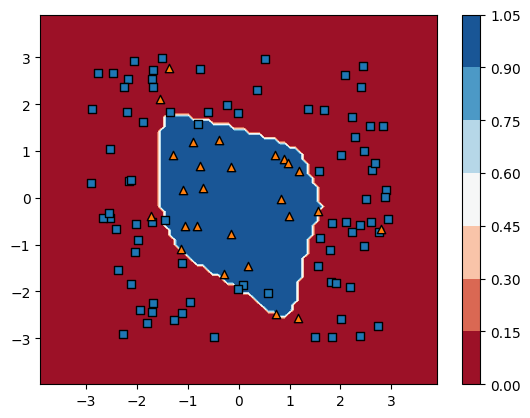

In [32]:
_plotting.plot_decision_boundary_2D(features, series_labels, model)